In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'D:\opencv\disaster prediction\disaster prediction\train.csv')

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
data.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [7]:
data.shape


(7613, 5)

In [8]:
data.duplicated().sum()

0

In [9]:
data=data.drop_duplicates(keep='first',ignore_index=True)
data.shape

(7613, 5)

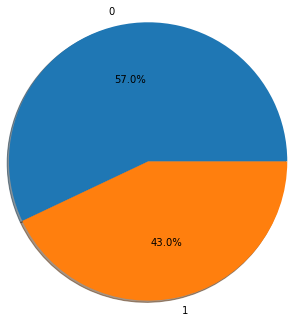

In [10]:
plt.pie(data.target.value_counts().values[0:8],labels=data.target.value_counts().index[0:8],autopct='%1.1f%%', shadow=True, radius=1.6)
plt.show()

data is moderately well balanced 

In [11]:
data.drop(data[['id','keyword','location']],axis=1,inplace=True)

In [12]:
data.text.apply(len)

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

### Feature creation 

length of text whether it's contributing to the prediction

In [13]:
data['text_length']=data['text'].apply(lambda x: len(x)-x.count(" "))

punctuations whether it's contributing to the prediction

In [14]:
import string 
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
data['text_punct']=data['text'].apply(lambda x: count_punct(x))    

In [15]:
data.head()

,text,target,text_length,text_punct
0,Our Deeds are the Reason of this #earthquake M...,1,57,1.8
1,Forest fire near La Ronge Sask. Canada,1,32,3.1
2,All residents asked to 'shelter in place' are ...,1,112,2.7
3,"13,000 people receive #wildfires evacuation or...",1,57,3.5
4,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8


Evaluating how new features are contributing to the classification

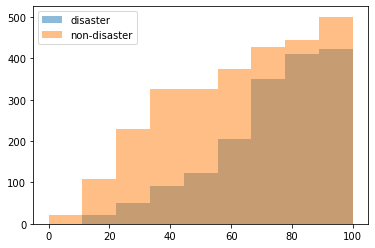

In [16]:
bins = np.linspace(0,100,10)
plt.hist(data[data['target']==1]['text_length'],bins,alpha=0.5,label='disaster')
plt.hist(data[data['target']==0]['text_length'],bins,alpha=0.5,label='non-disaster')
plt.legend(loc='upper left')
plt.show()

lesser word length have lesser chance to be a disaster news 

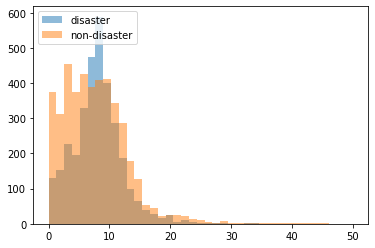

In [17]:
bins = np.linspace(0,50,40)
plt.hist(data[data['target']==1]['text_punct'],bins,alpha=0.5,label='disaster')
plt.hist(data[data['target']==0]['text_punct'],bins,alpha=0.5,label='non-disaster')
plt.legend(loc='upper left')
plt.show()

As per our hypothesis this model  have lesser scope to be contribute to the final model 

### lower casing

In [18]:
data['text']=data['text'].str.lower()

### regex to remove the html tags

In [19]:
import re
def remove_html(text):
    pattern=re.compile('<.#?>')
    return pattern.sub(r'',text)
data['text']=data['text'].apply(remove_html)

In [20]:
data.text_length.max()

138

### remove punctuations

In [21]:
import string 
exclude=string.punctuation
def remove_punct(text):
    for i in exclude:
        text=text.replace(i,'')
    return text
data['text']=data['text'].apply(remove_punct)

### remove urls

In [22]:
import re
def remove_url(text):
    return re.sub(r'https?:\S*''','',text)
data['text']=data['text'].apply(remove_url)

In [23]:
data

,text,target,text_length,text_punct
0,our deeds are the reason of this earthquake ma...,1,57,1.8
1,forest fire near la ronge sask canada,1,32,3.1
2,all residents asked to shelter in place are be...,1,112,2.7
3,13000 people receive wildfires evacuation orde...,1,57,3.5
4,just got sent this photo from ruby alaska as s...,1,72,2.8
...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,73,6.8
7609,ariaahrary thetawniest the out of control wild...,1,106,4.7
7610,m194 0104 utc5km s of volcano hawaii httptcozd...,1,58,19.0
7611,police investigating after an ebike collided w...,1,119,4.2


### remove numbers and special characters

In [24]:
def remove_num(text):
    pattern=r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern,'',text)
data['text']=data['text'].apply(remove_num)

In [25]:
import nltk

### tokenize

In [26]:
data['text_token']=data['text'].apply(lambda x:nltk.word_tokenize(x))

### stop words

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
def stopword(text):
    y=[]
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
    return y
data['text_token']=data['text_token'].apply(stopword)

In [29]:
data

,text,target,text_length,text_punct,text_token
0,our deeds are the reason of this earthquake ma...,1,57,1.8,"[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask canada,1,32,3.1,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to shelter in place are be...,1,112,2.7,"[residents, asked, shelter, place, notified, o..."
3,people receive wildfires evacuation orders in...,1,57,3.5,"[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby alaska as s...,1,72,2.8,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,73,6.8,"[two, giant, cranes, holding, bridge, collapse..."
7609,ariaahrary thetawniest the out of control wild...,1,106,4.7,"[ariaahrary, thetawniest, control, wild, fires..."
7610,m utckm s of volcano hawaii httptcozdtoydebj,1,58,19.0,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,police investigating after an ebike collided w...,1,119,4.2,"[police, investigating, ebike, collided, car, ..."


### stemming

In [30]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemmer(text):
    text=[ps.stem(word) for word in text]
    return text
data['text_token']=data['text_token'].apply(lambda x: stemmer(x))

stemming is relatively faster than lemmatization , hence considering stemming

In [31]:
data

,text,target,text_length,text_punct,text_token
0,our deeds are the reason of this earthquake ma...,1,57,1.8,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,forest fire near la ronge sask canada,1,32,3.1,"[forest, fire, near, la, rong, sask, canada]"
2,all residents asked to shelter in place are be...,1,112,2.7,"[resid, ask, shelter, place, notifi, offic, ev..."
3,people receive wildfires evacuation orders in...,1,57,3.5,"[peopl, receiv, wildfir, evacu, order, califor..."
4,just got sent this photo from ruby alaska as s...,1,72,2.8,"[got, sent, photo, rubi, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,73,6.8,"[two, giant, crane, hold, bridg, collaps, near..."
7609,ariaahrary thetawniest the out of control wild...,1,106,4.7,"[ariaahrari, thetawniest, control, wild, fire,..."
7610,m utckm s of volcano hawaii httptcozdtoydebj,1,58,19.0,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,police investigating after an ebike collided w...,1,119,4.2,"[polic, investig, ebik, collid, car, littl, po..."


In [32]:
from wordcloud import WordCloud
wc=WordCloud(width=300,height=300,min_font_size=10,background_color='white')

In [33]:
wc1 = wc.generate(data[data['target']==1]['text'].str.cat(sep=" "))

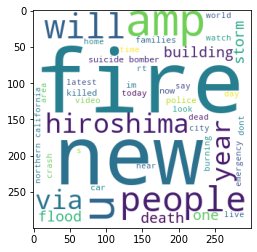

In [34]:
plt.imshow(wc)

In [35]:
wc2 = wc.generate(data[data['target']==0]['text'].str.cat(sep=" "))

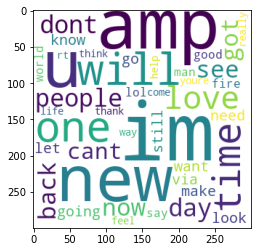

In [36]:
plt.imshow(wc2)

In [37]:
data['text_length'].describe()

count    7613.000000
mean       87.108499
std        29.151660
min         6.000000
25%        67.000000
50%        92.000000
75%       114.000000
max       138.000000
Name: text_length, dtype: float64

In [38]:
#standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['text_length']=scaler.fit_transform(data['text_length'].values.reshape(-1,1))

### text vectorization 

Count vectorization

In [39]:
data

,text,target,text_length,text_punct,text_token
0,our deeds are the reason of this earthquake ma...,1,-1.032891,1.8,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,forest fire near la ronge sask canada,1,-1.890531,3.1,"[forest, fire, near, la, rong, sask, canada]"
2,all residents asked to shelter in place are be...,1,0.853918,2.7,"[resid, ask, shelter, place, notifi, offic, ev..."
3,people receive wildfires evacuation orders in...,1,-1.032891,3.5,"[peopl, receiv, wildfir, evacu, order, califor..."
4,just got sent this photo from ruby alaska as s...,1,-0.518306,2.8,"[got, sent, photo, rubi, alaska, smoke, wildfi..."
...,...,...,...,...,...
7608,two giant cranes holding a bridge collapse int...,1,-0.484001,6.8,"[two, giant, crane, hold, bridg, collaps, near..."
7609,ariaahrary thetawniest the out of control wild...,1,0.648085,4.7,"[ariaahrari, thetawniest, control, wild, fire,..."
7610,m utckm s of volcano hawaii httptcozdtoydebj,1,-0.998585,19.0,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,police investigating after an ebike collided w...,1,1.094058,4.2,"[polic, investig, ebik, collid, car, littl, po..."


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
Countvec=CountVectorizer(min_df=2,max_df=5)
x_counts=Countvec.fit_transform(data['text'])
print(x_counts.shape)
print(Countvec.get_feature_names()[15:30])

(7613, 4140)
['abusing', 'ac', 'acc', 'accept', 'accidentally', 'accionempresa', 'accounts', 'accused', 'accuses', 'accustomed', 'acdelco', 'achimota', 'acid', 'acoustic', 'acquire']


TF-IDF Method

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,4),min_df=2,max_df=5)
x_tf=tfidf.fit_transform(data['text'])
print(x_tf.shape)
print(tfidf.idf_)
print(tfidf.get_feature_names()[15:30])

(7613, 21683)
[8.55144958 8.55144958 8.14598447 ... 8.83913165 8.83913165 8.83913165]
['abia', 'ability', 'ability to', 'ablaze amp', 'ablaze and', 'ablaze in', 'ablaze in california', 'ablaze in california alone', 'abomb', 'abomination', 'abomination that', 'abomination that maketh', 'abomination that maketh desolate', 'abortion', 'about cable']


### Model creation

In [56]:
data2=pd.concat([data['text_length'],data['target'],pd.DataFrame(x_tf.toarray())],axis=1)
tfidf=pd.DataFrame(x_tf.toarray())

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data2.drop(data[['target','text_length']],axis=1),data2['target'],test_size=0.3,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test),recall_score(y_test,y_pred)))

accuracy score 0.623029772329247
precision 0.7950310559006211 -------- recall0.7950310559006211 


In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.77      0.60       853
           1       0.80      0.54      0.64      1431

    accuracy                           0.62      2284
   macro avg       0.65      0.65      0.62      2284
weighted avg       0.68      0.62      0.63      2284

[[655 198]
 [663 768]]


In [46]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
strat=StratifiedKFold(n_splits=5)
result=cross_val_score(rf,data2.drop(data[['target','text_length']],axis=1),data2['target'],cv=strat)

In [47]:
np.mean(result)

0.5598349616006171

In [48]:
rf=RandomForestClassifier(n_estimators=10,max_depth=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test),recall_score(y_test,y_pred)))

accuracy score 0.6182136602451839
precision 0.8115942028985508 -------- recall0.8115942028985508 


In [ ]:
'''from sklearn.model_selection import GridSearchCV
param={'n_estimators':[10,150,300],
       'max_depth':[30,60,90,None]
    }
gv=GridSearchCV(rf,param,cv=5,n_jobs=-1)
gv.fit(data2.drop(data[['target','text_length']],axis=1),data2['target'])
pd.DataFrame((gv.fit.cv_results_).sort_values('mean_test_score'),ascending=False[0:5])'''

Dropped text_length : which is making the model overfiiting .(accuracy_score = 0.99998)

TF - IDF gives better recall than countvectorizer . Hence selecting TFIDF

Random forest shows better recall and precision than other models 

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [50]:
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test),recall_score(y_test,y_pred)))

accuracy score 0.6799474605954466
precision 0.5341614906832298 -------- recall0.5341614906832298 


In [140]:
from sklearn import svm
sv=svm.SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1752
           1       0.38      0.68      0.48       532

    accuracy                           0.66      2284
   macro avg       0.62      0.67      0.62      2284
weighted avg       0.76      0.66      0.69      2284

[[1149  603]
 [ 169  363]]


In [144]:
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test),recall_score(y_test,y_pred)))

accuracy score 0.6799474605954466
precision 0.5341614906832298 -------- recall0.5341614906832298 


Random forest gives best results for the model in case of precision and recall than other model

In [61]:
import pickle 
pickle.dump(x_tf,open('vectorizer.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))